In [1]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import nltk
from scipy.stats import itemfreq
import pycountry
import matplotlib.pyplot as plt
%matplotlib inline

You may need these data

In [2]:
nltk.download('twitter_samples'),nltk.download('opinion_lexicon')
nltk.download("vader_lexicon"), nltk.download('punkt')
nltk.download("wordnet")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/lvwenyuan/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/lvwenyuan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lvwenyuan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lvwenyuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lvwenyuan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
current_directory = 'hillary-clinton-emails/'
df = pd.read_csv(current_directory + 'Emails.csv', index_col=0)
df.head()

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


---
# Word Cloud

In [4]:
def plot_word_cloud(wordcloud):
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

## Generate word cloud on raw corpus

First, we generate a wordcloud on raw corpus. The corpus we used here is `ExtractedBodyText` column in the `Eamil.csv`. As `WordCloud` will use default stopwords for filtering even if we didn't want, we have to manually set the stopwords to empty.

In [5]:
all_body_text = (df.loc[:, 'ExtractedBodyText'].dropna()).sum()

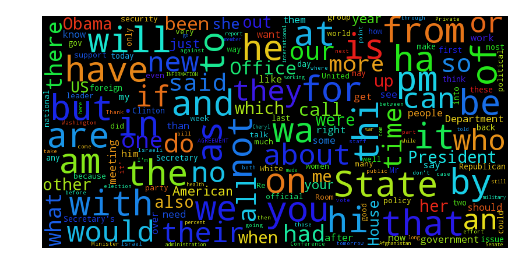

In [6]:
wordcloud = WordCloud(max_font_size=60, width=800, height=400)
wordcloud.stopwords = {}
wordcloud = wordcloud.generate(all_body_text)
plot_word_cloud(wordcloud)

## Generate word cloud with preprocessing

### Preprocessing Strategies

1. filter out some email word like `fw`, `fwd`, `subject` and so on
2. case folding: reduce all letters to lower case
3. ignoring punctuates

TODO: (maybe)

1. Try Lemmatization
2. Try Stemming

##### Remove Punctuation

In [7]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans({key: '' for key in string.punctuation}))

##### Generate stopwords

In [81]:
email_word_list = ['fw', 'fwd', 'subject', 'to', 're', 'pm', 
                   'will', 'case', 'also', 're', 'call', 'may', 'mr', 'ms', 'mrs','fyi']
stopwords = set(email_word_list).union(set(STOPWORDS))

In [9]:
import re
# function to split the digits and letters of every entities in tokens
def split_digi_letter(tokens):
    # define a empty list, store the string after splitting the digits and letters
    tokens_refined = []
    for i in tokens:
        for j in re.findall('\d+|\D+', i):
            tokens_refined.append(j)
    return tokens_refined

##### Processing words

In [10]:
# Concatenate all the Extracted Body Text
txt = (df.loc[:, 'ExtractedBodyText'].dropna()).sum()
txt = remove_punctuation(txt)
tokens = nltk.word_tokenize(txt)
tokens = [i.lower() for i in tokens if i.lower() not in stopwords]
tokens_origin = split_digi_letter(tokens)
tokens_freq = itemfreq(tokens_origin)
tokens, tokens_freq = tokens_freq[:, 0], tokens_freq[:, 1].astype(int)
tokens_x_freq = [(tokens[i], tokens_freq[i]) for i in range(len(tokens))]

##### Create word cloud

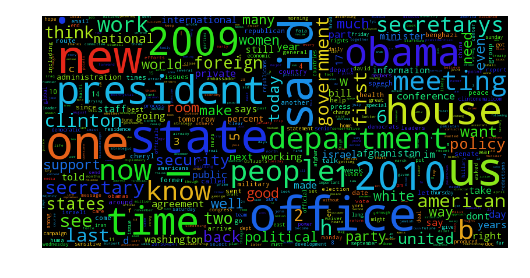

In [11]:
wordcloud = WordCloud(max_font_size=80, 
                      stopwords=STOPWORDS, 
                      width=800, 
                      height=400,
                     max_words=500).generate_from_frequencies(tokens_x_freq)
plot_word_cloud(wordcloud)

In the above wordcloud, we find words like `president`, `department`, `obama`, `state`, `office`, `meeting` are very common in this cloud. It is reasonable to think that Hillary Clinton uses her private email server for official communications which may leak top secret of america.

#### Stemming

We will use *nltk.stem.lancaster*, *nltk.stem.snowball* and *nltk.stem.wordnet* module to stem the tokens. 

In [12]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

In [13]:
st = LancasterStemmer()
pt = SnowballStemmer('english')
wnl = WordNetLemmatizer()

In [14]:
def compare_stem(word1, word2, method_name):
    """if two words have same """
    if method_name == wnl:
        return method_name.lemmatize(word1) == method_name.lemmatize(word2)
    else:
        return method_name.stem(word1) ==  method_name.stem(word2)

In [15]:
word1 = 'homegene'
word2 = 'homegeneous'
method_name = wnl
print('wnl method result: ',compare_stem(word1, word2, method_name))
method_name = st
print('st method result: ',compare_stem(word1, word2, method_name))
method_name = pt
print('pt method result: ',compare_stem(word1, word2, method_name))

wnl method result:  False
st method result:  True
pt method result:  True


Above results show that *wnl* method is more accurate than the other two. Hence, we use this method in the later analysis.

In [16]:
# stemming the tokens word by LancasterStemmer
token_stemmed = [wnl.lemmatize(i) for i in tokens_origin]
# Since we cannot get any information from digit strings,
# we will simply drop those strings and perform analysis to the rest.
token_stemmed_reduced = [i for i in token_stemmed if not i.isdigit()]
# drop single letter tokens
token_stemmed_reduced = [i for i in token_stemmed_reduced if len(i)>1]

### Creat word cloud

In [17]:
tokens_freq_postprocess = itemfreq(token_stemmed_reduced)
tokens1, tokens_freq1 = tokens_freq_postprocess[:, 0], tokens_freq_postprocess[:, 1].astype(int)
tokens_x_freq = [(tokens1[i], tokens_freq1[i]) for i in range(len(tokens1))]

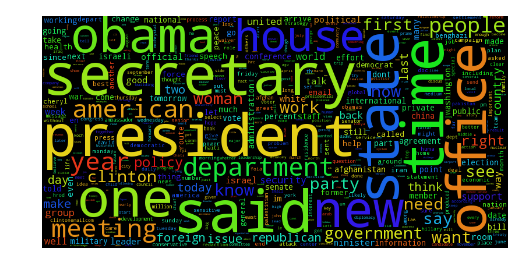

In [18]:
wordcloud = WordCloud(max_font_size=100, 
                      stopwords=STOPWORDS, 
                      width=800, 
                      height=400,
                     max_words=500).generate_from_frequencies(tokens_x_freq)
plot_word_cloud(wordcloud)

In the above wordcloud, we found a new list of words, like `secretary`, `president`, `department`, `obama`, `state`, `office`, `meeting`. They are very common in this cloud. It is reasonable to think that Hillary Clinton uses her private email server for official communications which may leak top secret of america.

### Remining problem

In [19]:
# problem: how to segement these string which may contain useful informations
j = 0
k = 0
for i in token_stemmed_reduced:
    if len(i)>15:
        j = j+1
        k = k + len(i)
print('number of non-processed word:',j,', non-processed word total length', k)

number of non-processed word: 1811 , non-processed word total length 36790


### Conclusion

The first approach creates a wordcloud on raw corpus. It is very easy to use and reflects the frequencies of the words in the data. However, it has many disadvantages. Words like `a, the, be` ... dominates the screen. These words are frequently used in any context and they didn't provide useful information about the topic of email. Besides, words are not normalized.

The second approach will process data first. By adding stopwords, tokenization, and stemming, we see a graph with much better results. Now it is much easier to know the topics of these emails without effort.

## Exercise 2

Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?


### Mentioned countries
1. convert to lower case and tokenize all the body text.
2. intersect body text with country names in lowercase. 
3. intersect body text with country abbreviations in lowercase.
4. union all the mentioned countries and make it unique

Difficulties:

1. Some of abbreviations `alpha_2` and `alpha_3` has other meanings.
   1. 'PM' refers to 'saint pierre and miquelon'
   2. Norway alpha_2='NO'
   and so on
   
   It is reasonable to believe, people will not refer to misleading abbreviations in their emails. In fact, after checking the coutries found by `alpha_2`, `alpha_3`, we found only very very few countries will be refer in abbreviation and most of the times it is `U.S.`. So we only add some special cases rather than checkout all of them.

2. Some countries are usually refered in a way which different from `name/alpha_2/alpha_3`.

    For example, Syria is not listed because its name is `Syrian Arab Republic`, and Russia is `Russian federal`.
    The same case happen to some other place.

    We will add special cases to it.

3. include special case  EU, U.N., Benghazi

In [20]:
# Map Country names
country_abbreviations_alpha_2 = [i.alpha_2 for i in pycountry.countries]
country_abbreviations_alpha_3 = [i.alpha_3 for i in pycountry.countries]
country_abbreviations_name    = [i.name for i in pycountry.countries]

def get_common_name_map():
    common_name_map = dict()
    common_name_map['syrian'] = 'Syrian Arab Republic'
    common_name_map['syria']  = 'Syrian Arab Republic'
    common_name_map['russia'] = 'Russian Federation'
    common_name_map['u.s.']   = 'United States'
    
    common_name_map['u.n.']     = 'UN'
    common_name_map['benghazi'] = 'Libya'
    common_name_map['eu']       = 'EU'

    for name in country_abbreviations_name:
        common_name_map[name.lower()] = name
        
    return common_name_map

common_name_map = get_common_name_map()

In [21]:
def tokenize_text(txt):
    return nltk.word_tokenize(txt)

def find_countries_in_text(tokenized_txt, country_list = common_name_map.keys()):
    lower_tokenized_text = set([i.lower() for i in tokenized_txt])
    return lower_tokenized_text.intersection(country_list)

In [22]:
tokenized_body_text = nltk.word_tokenize(all_body_text)
lower_tokenized_text = set([i.lower() for i in tokenized_body_text])

In [23]:
countries_found = find_countries_in_text(lower_tokenized_text, common_name_map.keys())
[common_name_map[c] for c in countries_found]

['Bangladesh',
 'Bermuda',
 'EU',
 'Guinea-Bissau',
 'Liberia',
 'Georgia',
 'Kazakhstan',
 'Guyana',
 'Russian Federation',
 'Niger',
 'Sudan',
 'Azerbaijan',
 'Jamaica',
 'Jersey',
 'Malawi',
 'Ghana',
 'Australia',
 'Uzbekistan',
 'Malaysia',
 'Mongolia',
 'Greece',
 'Austria',
 'Bahamas',
 'Rwanda',
 'Kenya',
 'Italy',
 'Jordan',
 'Algeria',
 'Turkey',
 'China',
 'Yemen',
 'Zimbabwe',
 'Cuba',
 'Tajikistan',
 'Libya',
 'Canada',
 'Samoa',
 'Lithuania',
 'Serbia',
 'Chad',
 'Somalia',
 'Ireland',
 'Palau',
 'Kyrgyzstan',
 'Germany',
 'Angola',
 'Congo',
 'Chile',
 'Monaco',
 'Ecuador',
 'Denmark',
 'Latvia',
 'India',
 'Switzerland',
 'Tunisia',
 'Ethiopia',
 'Lebanon',
 'Qatar',
 'Nicaragua',
 'Ukraine',
 'Afghanistan',
 'Slovakia',
 'Singapore',
 'Guam',
 'Cameroon',
 'Nepal',
 'Syrian Arab Republic',
 'Sweden',
 'Uganda',
 'Portugal',
 'Kuwait',
 'Pakistan',
 'Hungary',
 'Greenland',
 'Malta',
 'Peru',
 'Finland',
 'Slovenia',
 'Armenia',
 'Iceland',
 'Argentina',
 'Indonesia',
 

### Sentiment analysis

`nltk.sentiment.util.demo_vader_instance` is used to analyse the polarity and sentiment of each

In [24]:
from nltk.sentiment import util
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [25]:
extrected_body_text_series = df.loc[:, 'ExtractedBodyText'].dropna()

In [26]:
def map_email_bodies_to_countries(email_bodies):
    """
    Parameters
    ----------
    email_bodies : pandas.Series
    
    Return
    ------
    country_to_emails : dict
        map lowercase country names to a list of indices of emails which mentions this country.
    
    """
    assert(email_bodies.dropna().shape == email_bodies.shape)
    country_to_emails = dict(zip(set(common_name_map.values()), [[ ] for i in range(len(common_name_map.values()))]))
    emails_to_country = dict(zip(set(email_bodies.index), [[ ] for i in range(len(email_bodies.index))]))

    for idx in email_bodies.index:
        email = tokenize_text(email_bodies.loc[idx])
        countries = find_countries_in_text(email)
        for c in countries:
            country_to_emails[common_name_map[c]].append(idx)
            emails_to_country[idx].append(common_name_map[c])
            
    return country_to_emails, emails_to_country

In [27]:
map_coutry_to_emails, map_emails_to_country = map_email_bodies_to_countries(extrected_body_text_series)

In [28]:
map_coutry_to_num_emails = dict()
for c in map_coutry_to_emails.keys():
    map_coutry_to_num_emails[c] = len(map_coutry_to_emails[c])

In [29]:
country_num_emails_df = pd.DataFrame(list(map_coutry_to_num_emails.items()), columns=['country', 'num'])
country_num_emails_df.set_index('country', inplace=True)
country_num_emails_df.head()

,num
country,
Indonesia,22
Western Sahara,0
Botswana,0
Congo,6
Nepal,1


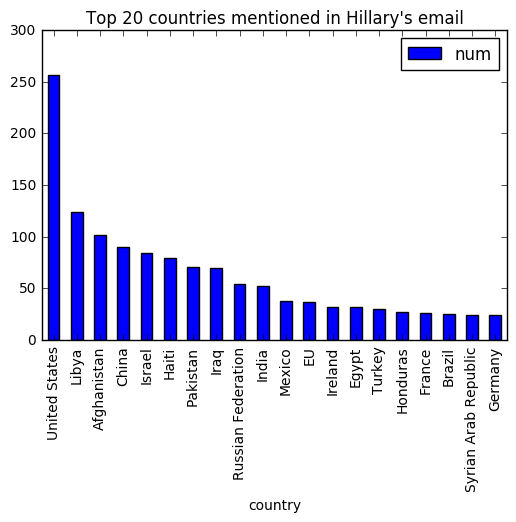

In [30]:
country_num_emails_df.sort_values('num', ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 countries mentioned in Hillary's email")
plt.show()

In [31]:
def map_email_to_vader_sentiment(emails):
    polarity_score = dict()
    for idx in emails.index:
        txt = emails.loc[idx]
        polarity_score[idx] = vader_analyzer.polarity_scores(txt)
    
    return polarity_score

Apply vader_analysis to emails. The results will be a dictionary `map_idx_to_sentiment`

It may take some time to do the computatoin.

In [32]:
import pickle
import os

if os.path.exists("map_idx_to_sentiment.pickle"):
    with open('map_idx_to_sentiment.pickle', 'rb') as handle:
        map_idx_to_sentiment = pickle.load(handle)
else:
    map_idx_to_sentiment = dict()
    map_idx_to_sentiment['vader'] = map_email_to_vader_sentiment(extrected_body_text_series)
    with open('map_idx_to_sentiment.pickle', 'wb') as handle:
        pickle.dump(map_idx_to_sentiment, handle)

In [33]:
def extract_senti(idx, senti):
    return [idx, senti['compound'], senti['neg'], senti['pos'], senti['neu']]

In [34]:
# a = np.array([extract_senti(idx, senti) for idx, senti in map_idx_to_sentiment['vader'].items()])

In [35]:
map_idx_to_sentiment['vader']

{2: {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 3: {'compound': 0.3612, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0},
 5: {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 6: {'compound': -0.8402, 'neg': 0.14, 'neu': 0.821, 'pos': 0.039},
 8: {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 9: {'compound': 0.2023, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0},
 10: {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 11: {'compound': 0.2023, 'neg': 0.0, 'neu': 0.357, 'pos': 0.643},
 12: {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 13: {'compound': 0.2023, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0},
 14: {'compound': 0.9881, 'neg': 0.089, 'neu': 0.8, 'pos': 0.111},
 15: {'compound': 0.9259, 'neg': 0.026, 'neu': 0.786, 'pos': 0.188},
 16: {'compound': 0.8869, 'neg': 0.069, 'neu': 0.795, 'pos': 0.137},
 17: {'compound': 0.4404, 'neg': 0.0, 'neu': 0.633, 'pos': 0.367},
 18: {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 19: {'compound': 0.4215, 'neg': 0.0, 'neu': 0.41

Gather data from dictionary and form a dataframe. The sentiment of each country is averaged and the counter of each.

Countries mentioned less than 5 times are not considered.

In [36]:
compound = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
neg   = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
pos   = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
neu   = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
count = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))

for idx, senti in map_idx_to_sentiment['vader'].items():
    for c in map_emails_to_country[idx]:
        compound[c] += senti['compound']
        neg[c] += senti['neg']
        pos[c] += senti['pos']
        neu[c] += senti['neu']
        count[c] += 1
        
for c, num in count.items():
    if num > 0:
        compound[c] = compound[c] / num
        neg[c] = neg[c] / num
        pos[c] = pos[c] / num
        neu[c] = neu[c] / num

In [37]:
a = []

for c, num in count.items():
    a.append((c, compound[c], neg[c],pos[c], neu[c], num))
    
country_x_senti = pd.DataFrame(a, columns=['country', 'compound', 'neg', 'pos', 'neu', 'num'])
country_x_senti.set_index('country', inplace=True)
country_x_senti.head()

,compound,neg,pos,neu,num
country,,,,,
Indonesia,0.489555,0.039455,0.094091,0.866500,22.0
Western Sahara,0.000000,0.000000,0.000000,0.000000,0.0
Botswana,0.000000,0.000000,0.000000,0.000000,0.0
Congo,-0.170800,0.095667,0.080333,0.823833,6.0
Nepal,0.675700,0.033000,0.086000,0.882000,1.0


In [38]:
top_countries = country_x_senti[country_x_senti.num > 5]
top_countries.head()

,compound,neg,pos,neu,num
country,,,,,
Indonesia,0.489555,0.039455,0.094091,0.866500,22.0
Congo,-0.170800,0.095667,0.080333,0.823833,6.0
United States,0.343821,0.069699,0.104094,0.826207,256.0
Russian Federation,0.414317,0.061352,0.103833,0.834741,54.0
Spain,0.153286,0.068500,0.097857,0.833714,14.0


### Overall

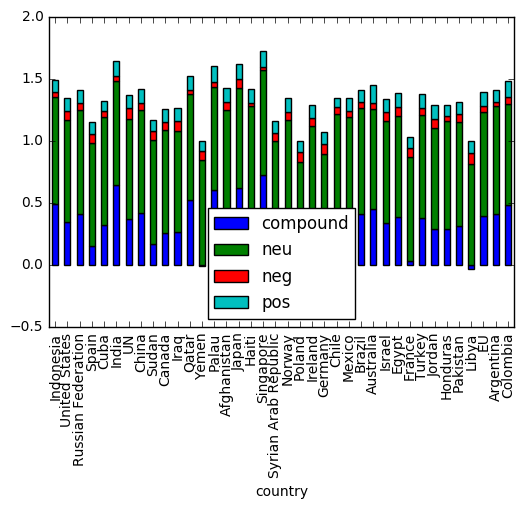

In [39]:
country_x_senti[country_x_senti.num > 10][['compound', 'neu', "neg", "pos"]].plot.bar(stacked=True)

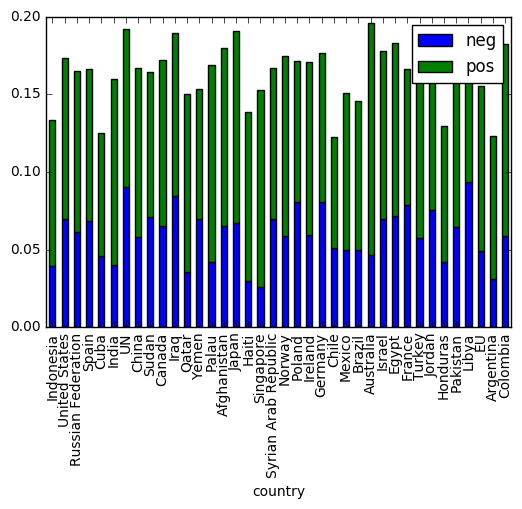

In [40]:
country_x_senti[country_x_senti.num > 10][["neg", "pos"]].plot.bar(stacked=True)

### Most Negative Sentiment countries

We sort the difference  

    neg - pos

to find the most negative sentiment. In this way, we can reduce the bias.

[]

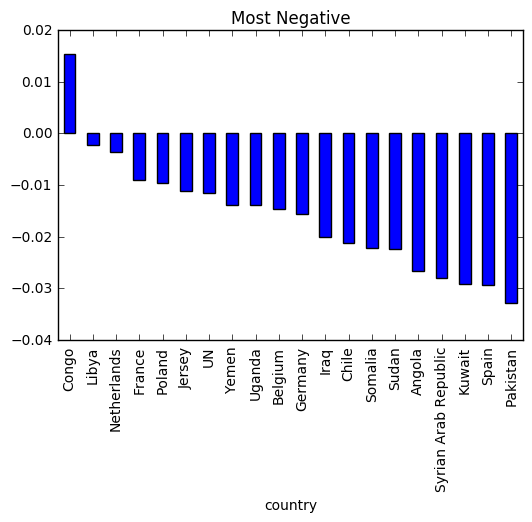

In [41]:
((top_countries['neg'] - top_countries['pos'])).sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Most Negative')
plt.plot()

It is well-known that `Benghazi attack` (Libya, 2012) is her nightmare. There is no doubt that `Libya` would rank high in this list.

It is very interesting to see that Hillary holds a much more negative view towards `Congo`. When we searched google with keyword `hillary` and `congo`, we find that she and her husband received a very high speaking fee from congo 

[http://www.forbes.com/sites/richardminiter/2016/04/17/why-did-congo-offer-clinton-650000-for-two-pics-and-a-speech/#436be0e33f11](http://www.forbes.com/sites/richardminiter/2016/04/17/why-did-congo-offer-clinton-650000-for-two-pics-and-a-speech/#436be0e33f11)

and a news about Hillary met a rude question in Congo http://thelede.blogs.nytimes.com/2009/08/13/was-hillary-clintons-answer-in-congo-the-right-one/?_r=0

[]

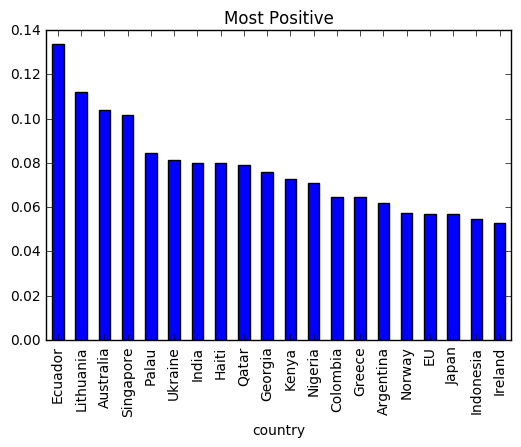

In [42]:
((top_countries['pos'] - top_countries['neg'])).sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Most Positive')
plt.plot()

## Other Sentimental analysis methods

#### Liu and Hu Lexicon

Modify Liu and Hu lexicon code in NLTK utility for speed reasons and collecting data.

In [43]:
def Liu_and_Hu(sentence):
    """ Liu and Hu sentiment analysis tool. Adapted from 
    http://www.nltk.org/_modules/nltk/sentiment/util.html#demo_liu_hu_lexicon"""
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = pd.Series([word.lower() for word in tokenizer.tokenize(sentence)])
    value_count = tokenized_sent.value_counts()
    pos_words = np.sum([value_count[w] for w in np.intersect1d(tokenized_sent, opinion_lexicon.positive())])
    neg_words = np.sum([value_count[w] for w in np.intersect1d(tokenized_sent, opinion_lexicon.negative())])
    
    if pos_words > neg_words:
        return 'Positive'
    elif pos_words < neg_words:
        return 'Negative'
    elif pos_words == neg_words:
        return 'Neutral'

In [44]:
def map_email_to_liu_and_hu_sentiment(emails):
    polarity_score = dict()
    for idx in emails.index:
        print(idx, len(emails))
        txt = emails.loc[idx]
        polarity_score[idx] = Liu_and_Hu(txt)
    
    return polarity_score

#### Analysing emails using liu and hu sentiment

In [45]:
if os.path.exists("map_idx_to_liu_and_hu.pickle"):
    with open('map_idx_to_liu_and_hu.pickle', 'rb') as handle:
        liu_and_hu_score = pickle.load(handle)
else:
    liu_and_hu_score = map_email_to_liu_and_hu_sentiment(extrected_body_text_series)
    with open('map_idx_to_liu_and_hu.pickle', 'wb') as handle:
        pickle.dump(liu_and_hu_score, handle)
        
map_idx_to_sentiment['liu_and_hu'] = liu_and_hu_score

2 6742
3 6742
5 6742
6 6742
8 6742
9 6742
10 6742
11 6742
12 6742
13 6742
14 6742
15 6742
16 6742
17 6742
18 6742
19 6742
20 6742
21 6742
22 6742
23 6742
24 6742
25 6742
26 6742
27 6742
28 6742
29 6742
30 6742
31 6742
32 6742
33 6742
34 6742
35 6742
37 6742
39 6742
40 6742
41 6742
42 6742
43 6742
44 6742
45 6742
46 6742
47 6742
48 6742
49 6742
50 6742
51 6742
52 6742
53 6742
54 6742
55 6742
56 6742
58 6742
59 6742
61 6742
62 6742
65 6742
66 6742
67 6742
68 6742
69 6742
70 6742
71 6742
72 6742
73 6742
74 6742
75 6742
76 6742
77 6742
78 6742
79 6742
80 6742
81 6742
82 6742
83 6742
86 6742
87 6742
88 6742
89 6742
90 6742
91 6742
92 6742
93 6742
94 6742
97 6742
98 6742
99 6742
100 6742
101 6742
102 6742
103 6742
104 6742
105 6742
106 6742
107 6742
108 6742
109 6742
110 6742
111 6742
112 6742
113 6742
114 6742
115 6742
116 6742
118 6742
119 6742
120 6742
121 6742
122 6742
123 6742
124 6742
125 6742
127 6742
128 6742
129 6742
130 6742
131 6742
132 6742
133 6742
134 6742
135 6742
136 6742
137

In [46]:
map_idx_to_sentiment['liu_and_hu']

{2: 'Neutral',
 3: 'Neutral',
 5: 'Neutral',
 6: 'Negative',
 8: 'Neutral',
 9: 'Neutral',
 10: 'Neutral',
 11: 'Neutral',
 12: 'Neutral',
 13: 'Neutral',
 14: 'Positive',
 15: 'Positive',
 16: 'Positive',
 17: 'Neutral',
 18: 'Neutral',
 19: 'Positive',
 20: 'Neutral',
 21: 'Neutral',
 22: 'Neutral',
 23: 'Neutral',
 24: 'Neutral',
 25: 'Neutral',
 26: 'Neutral',
 27: 'Neutral',
 28: 'Neutral',
 29: 'Negative',
 30: 'Neutral',
 31: 'Neutral',
 32: 'Neutral',
 33: 'Negative',
 34: 'Neutral',
 35: 'Neutral',
 37: 'Positive',
 39: 'Positive',
 40: 'Positive',
 41: 'Neutral',
 42: 'Positive',
 43: 'Neutral',
 44: 'Neutral',
 45: 'Neutral',
 46: 'Positive',
 47: 'Negative',
 48: 'Neutral',
 49: 'Neutral',
 50: 'Positive',
 51: 'Neutral',
 52: 'Positive',
 53: 'Negative',
 54: 'Neutral',
 55: 'Positive',
 56: 'Negative',
 58: 'Positive',
 59: 'Neutral',
 61: 'Neutral',
 62: 'Neutral',
 65: 'Positive',
 66: 'Neutral',
 67: 'Neutral',
 68: 'Neutral',
 69: 'Neutral',
 70: 'Neutral',
 71: 'Neut

##### Constructing a dataframe from analysing results

In [48]:
positive = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
negative = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
neutral  = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
count    = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))

for idx, senti in map_idx_to_sentiment['liu_and_hu'].items():
    for c in map_emails_to_country[idx]:
        if senti == 'Positive':
            positive[c] += 1
        elif senti == 'Negative':
            negative[c] += 1
        else:
            neutral[c] += 1
            
        count[c] += 1
        
for c, num in count.items():
    if num > 0:
        negative[c] = negative[c] / num
        positive[c] = positive[c] / num
        neutral[c] = neutral[c] / num

In [49]:
a = []

for c, num in count.items():
    a.append((c, negative[c], positive[c], neutral[c], num))
    
country_x_senti = pd.DataFrame(a, columns=['country', 'negative', 'positive', 'neutral', 'num'])
country_x_senti.set_index('country', inplace=True)
country_x_senti.head()

,negative,positive,neutral,num
country,,,,
Rwanda,0.200000,0.800000,0.000000,5.0
Samoa,0.000000,1.000000,0.000000,1.0
Uzbekistan,0.333333,0.666667,0.000000,3.0
Tonga,0.000000,0.000000,0.000000,0.0
Denmark,0.333333,0.333333,0.333333,3.0


In [50]:
top_countries = country_x_senti[country_x_senti.num > 5]
top_countries.head()

,negative,positive,neutral,num
country,,,,
India,0.192308,0.673077,0.134615,52.0
Chile,0.250000,0.416667,0.333333,12.0
Qatar,0.153846,0.538462,0.307692,13.0
Uruguay,0.250000,0.375000,0.375000,8.0
Belgium,0.500000,0.166667,0.333333,6.0


#### Plot the most negative and most positive countries in Hillary's email using Liu and Hu

Congo is still the most unfavorable country in this method. Other european country also keeps same positions as we did in vader analysis. However, Libya and Syrian does not appear in this list. Syria is even in the positive list.

[]

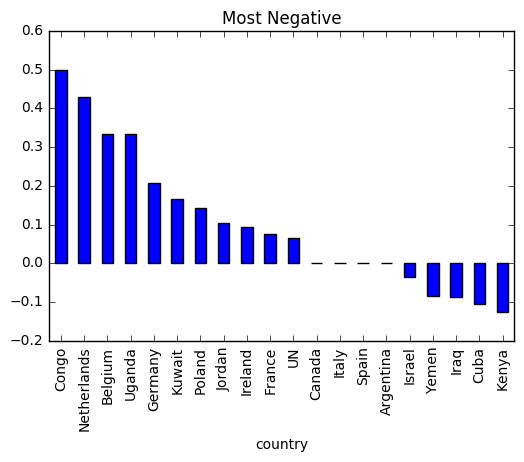

In [51]:
((top_countries['negative'] - top_countries['positive'])).sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Most Negative')
plt.plot()

[]

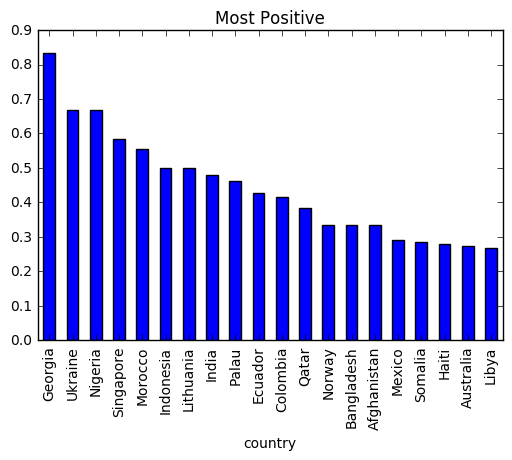

In [52]:
((top_countries['positive'] - top_countries['negative'])).sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Most Positive')
plt.plot()

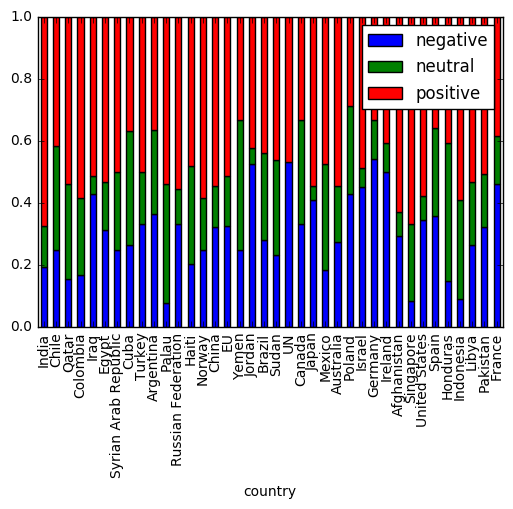

In [82]:
country_x_senti[country_x_senti.num > 10][["negative", 'neutral', "positive"]].plot.bar(stacked=True)

## Exercise 3

Using the *models.ldamodel* module from the **gensim** library, run topic modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which returns topics that you consider to be meaningful at first sight.

In [47]:
from gensim import corpora, models
import gensim

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


There is a confusion that we use the summed data or the data that each row contains one email's content.

### sliptted email text

In [84]:
# function to compute the tokens
def compute_tokens(body_text):
    # list of index 
    index_list = body_text.index
    # list for tokenized documents in loop
    texts = []
    for i in index_list:    
        txt = remove_punctuation(body_text.loc[i])
        tokens = nltk.word_tokenize(txt)
        tokens = [i.lower() for i in tokens if i.lower() not in stopwords]
        tokens_origin = split_digi_letter(tokens)
        # stemming the tokens word by LancasterStemmer
        token_stemmed = [wnl.lemmatize(i) for i in tokens_origin]
        # drop those strings and perform analysis to the rest.
        token_stemmed_reduced = [i for i in token_stemmed if not i.isdigit()]
        # drop single letter tokens
        token_stemmed_reduced = [i for i in token_stemmed_reduced if len(i)>1]
        # add tokens to list
        texts.append(token_stemmed_reduced)
    return texts

In [85]:
# data set we use
body_text = df.loc[:, 'ExtractedBodyText'].dropna()
# compute tokens
texts = compute_tokens(body_text)

In [86]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)   
#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

The next part we try to explore different numbers of topics (varying from 5 to 50), and settle for the parameter to get topics that looks meaningful. 

In [97]:
# set the number of topics as 5
lda = models.LdaModel(corpus, num_topics=5, 
                      id2word=dictionary, update_every=5, 
                      chunksize=100, passes=10)

In [98]:
#show the 5 topics 
lda.show_topics()

[(0,
  '0.011*"state" + 0.011*"doc" + 0.009*"benghazi" + 0.008*"date" + 0.007*"information" + 0.007*"dept" + 0.006*"comm" + 0.006*"sensitive" + 0.006*"produced" + 0.006*"select"'),
 (1,
  '0.009*"party" + 0.008*"obama" + 0.007*"israel" + 0.007*"american" + 0.005*"president" + 0.005*"israeli" + 0.004*"election" + 0.004*"percent" + 0.004*"political" + 0.004*"new"'),
 (2,
  '0.008*"state" + 0.005*"new" + 0.005*"woman" + 0.005*"government" + 0.004*"one" + 0.004*"people" + 0.004*"security" + 0.004*"country" + 0.004*"said" + 0.004*"world"'),
 (3,
  '0.007*"said" + 0.006*"republican" + 0.006*"bill" + 0.005*"one" + 0.005*"house" + 0.005*"say" + 0.005*"senate" + 0.005*"think" + 0.004*"dont" + 0.004*"now"'),
 (4,
  '0.019*"secretary" + 0.017*"office" + 0.012*"meeting" + 0.009*"state" + 0.009*"room" + 0.008*"time" + 0.007*"see" + 0.007*"tomorrow" + 0.007*"department" + 0.006*"ok"')]

In [99]:
#convert the topics into just a list of the top 20 words in each topic.
topics_matrix = lda.show_topics(formatted=False, num_words=20)
for i in range(len(topics_matrix)):
    topics_matrix_word = list(np.asarray(topics_matrix[i][1])[:,0])
    print([str(word) for word in topics_matrix_word])
    print()

['state', 'doc', 'benghazi', 'date', 'information', 'dept', 'comm', 'sensitive', 'produced', 'select', 'waiver', 'redaction', 'foia', 'agreement', 'lauren', 'message', 'house', 'department', 'ill', 'libya']

['party', 'obama', 'israel', 'american', 'president', 'israeli', 'election', 'percent', 'political', 'new', 'time', 'republican', 'palestinian', 'one', 'said', 'settlement', 'conservative', 'say', 'voter', 'democrat']

['state', 'new', 'woman', 'government', 'one', 'people', 'security', 'country', 'said', 'world', 'year', 'united', 'policy', 'american', 'president', 'work', 'effort', 'need', 'issue', 'official']

['said', 'republican', 'bill', 'one', 'house', 'say', 'senate', 'think', 'dont', 'now', 'day', 'year', 'time', 'good', 'president', 'koch', 'know', 'senator', 'book', 'care']

['secretary', 'office', 'meeting', 'state', 'room', 'time', 'see', 'tomorrow', 'department', 'ok', 'arrive', 'know', 'route', 'en', 'cheryl', 'depart', 'pls', 'huma', 'private', 'monday']



The result shows that 5 top topics are about Benghazi Attack, Israel-Palestine, woman right, Koch Brothers,meeting with Cheryl Mills(at least looks like discussing personal schedule and meeting)

In [126]:
# set the number of topics as 9
lda = models.LdaModel(corpus, num_topics=9, 
                      id2word=dictionary, update_every=5, 
                      chunksize=100, passes=10)

In [127]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
for i in range(len(topics_matrix)):
    topics_matrix_word = list(np.asarray(topics_matrix[i][1])[:,0])
    print([str(word) for word in topics_matrix_word])
    print()

['health', 'care', 'beck', 'food', 'cable', 'bill', 'amendment', 'skousen', 'reform', 'released', 'death', 'family', 'house', 'healthcare', 'statement', 'panel', 'committee', 'movement', 'doctor', 'hiker']

['state', 'doc', 'benghazi', 'information', 'date', 'sensitive', 'produced', 'department', 'dept', 'house', 'agreement', 'select', 'comm', 'waiver', 'foia', 'redaction', 'libya', 'press', 'holiday', 'clip']

['party', 'republican', 'said', 'obama', 'vote', 'democrat', 'president', 'election', 'one', 'say', 'new', 'house', 'senate', 'political', 'year', 'american', 'conservative', 'white', 'democratic', 'time']

['secretary', 'office', 'meeting', 'state', 'room', 'department', 'arrive', 'route', 'en', 'depart', 'private', 'conference', 'time', 'residence', 'pm', 'cheryl', 'daily', 'staff', 'mill', 'am']

['email', 'ill', 'think', 'today', 'thank', 'thanks', 'cdm', 'please', 'draft', 'im', 'good', 'need', 'well', 'add', 'send', 'work', 'sent', 'see', 'list', 'know']

['know', 'see', '

Increasing the number of topics to 9, the results are about Benghazi Attack, Israel-Palestine, woman right, ,personal schedule,Haiti issue, national policy, health issue.

In [128]:
# set the number of topics as 20
lda = models.LdaModel(corpus, num_topics=20, 
                      id2word=dictionary, update_every=5, 
                      chunksize=100, passes=10)

In [132]:
topics_matrix = lda.show_topics(formatted=False, num_topics=20,num_words=20)
for i in range(len(topics_matrix)):
    topics_matrix_word = list(np.asarray(topics_matrix[i][1])[:,0])
    print([str(word) for word in topics_matrix_word])
    print()

['settlement', 'clintonemailcom', 'hrod', 'tuesday', 'blair', 'sbwhoeop', 'message', 'saturday', 'sullivan', 'sunday', 'november', 'monday', 'sullivanjjstategov', 'jacob', 'wednesday', 'december', 'michael', 'february', 'sid', 'friday']

['huma', 'abedin', 'abedinhstategov', 'saturday', 'refused', 'prince', 'august', 'sorry', 'strobe', 'florida', 'march', 'friday', 'uup', 'monday', 'pastor', 'bilat', 'wednesday', 'january', 'thursday', 'memo']

['email', 'cdm', 'ill', 'book', 'please', 'agree', 'great', 'see', 'read', 'brown', 'hear', 'think', 'thanks', 'language', 'gordon', 'add', 'idea', 'good', 'work', 'donor']

['state', 'woman', 'country', 'world', 'government', 'united', 'afghanistan', 'effort', 'diplomacy', 'china', 'policy', 'new', 'one', 'pakistan', 'conflict', 'year', 'global', 'war', 'development', 'people']

['beck', 'child', 'woman', 'death', 'year', 'life', 'love', 'people', 'palin', 'amendment', 'abortion', 'family', 'alexander', 'group', 'american', 'girl', 'state', 'jp

In [133]:
# set the number of topics as 40
lda = models.LdaModel(corpus, num_topics=40, 
                      id2word=dictionary, update_every=2, 
                      chunksize=100, passes=2)

In [134]:
topics_matrix = lda.show_topics(formatted=False, num_topics=40,num_words=20)
for i in range(len(topics_matrix)):
    topics_matrix_word = list(np.asarray(topics_matrix[i][1])[:,0])
    print([str(word) for word in topics_matrix_word])
    print()

['woman', 'afghan', 'cheryl', 'mill', 'august', 'millscdstategov', 'burn', 'usaid', 'wikileaks', 'postconflict', 'training', 'issue', 'appears', 'behalf', 'medical', 'ambassador', 'urgent', 'friday', 'thursday', 'met']

['pm', 'hear', 'wont', 'plan', 'called', 'saudi', 'deliver', 'happening', 'waiting', 'miss', 'pledge', 'flight', 'update', 'mack', 'nato', 'aware', 'jordan', 'envoy', 'nothing', 'approved']

['candidate', 'john', 'lobbyist', 'speaker', 'prepared', 'building', 'plane', 'sheet', 'secret', 'governor', 'track', 'frank', 'theory', 'kentucky', 'headline', 'winner', 'lp', 'tested', 'dedicated', 'definitely']

['china', 'spoke', 'deal', 'heart', 'prince', 'year', 'country', 'danger', 'ten', 'father', 'max', 'connect', 'started', 'life', 'long', 'friend', 'said', 'family', 'ago', 'foundation']

['doc', 'confirmed', 'date', 'suggested', 'serve', 'house', 'hotel', 'fine', 'announce', 'roger', 'san', 'confirm', 'comfortable', 'express', 'bob', 'state', 'harold', 'maria', 'raj', 'co

In [136]:
# set the number of topics as 50
lda = models.LdaModel(corpus, num_topics=50, 
                      id2word=dictionary, update_every=1, 
                      chunksize=100, passes=1)

In [137]:
topics_matrix = lda.show_topics(formatted=False, num_topics=40,num_words=20)
for i in range(len(topics_matrix)):
    topics_matrix_word = list(np.asarray(topics_matrix[i][1])[:,0])
    print([str(word) for word in topics_matrix_word])
    print()

['york', 'mayor', 'new', 'senator', 'big', 'politics', 'cloture', 'follow', 'seemed', 'option', 'april', 'evidence', 'bloombergs', 'aide', 'editor', 'gop', 'matter', 'fox', 'brown', 'mentioned']

['work', 'today', 'back', 'time', 'called', 'working', 'later', 'want', 'make', 'thought', 'page', 'ask', 'might', 'tuesday', 'fm', 'netanyahu', 'still', 'take', 'schedule', 'found']

['print', 'pi', 'thursday', 'sid', 'call', 'august', 'original', 'memo', 'march', 'hrc', 'conversation', 'september', 'friday', 'pas', 'quick', 'november', 'colombia', 'notetaker', 'pir', 'messa']

['settlement', 'happy', 'huma', 'abedin', 'here', 'abedinhstategov', 'truck', 'wilson', 'settler', 'drop', 'mazen', 'friday', 'organizing', 'woodrow', 'intel', 'permitted', 'humaclintonemailcom', 'reservation', 'suu', 'aung']

['need', 'israeli', 'speech', 'statement', 'didnt', 'point', 'name', 'bibi', 'nothing', 'first', 'doctor', 'maybe', 'germany', 'xo', 'proposed', 'woodward', 'avoiding', 'unsigned', 'make', 'guida

With the number of topics increasing, it reveals more and more  leaked emails' topics.

---
## Exercise 4

BONUS: build the communication graph (unweighted and undirected) among the different email senders and recipients using the NetworkX library. Find communities in this graph with community.best_partition(G) method from the community detection module. Print the most frequent 20 words used by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA? Can you identify clear discussion topics for each community? Discuss briefly the obtained results.

In [63]:
all_sender_receiver = (df.loc[:, ['MetadataFrom','SenderPersonId','MetadataTo','ExtractedBodyText']].dropna())

In [64]:
all_sender_receiver.head()

,MetadataFrom,SenderPersonId,MetadataTo,ExtractedBodyText
Id,,,,
3,"Mills, Cheryl D",32.0,;H,Thx
5,H,80.0,"Abedin, Huma","H <hrod17@clintonemail.com>\nFriday, March 11,..."
6,H,80.0,Russorv@state.gov,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
8,H,80.0,"Abedin, Huma","H <hrod17@clintonemail.corn>\nFriday, March 11..."
9,"Sullivan, Jacob J",87.0,H,FYI


In [65]:
df_receiver = pd.read_csv(current_directory + 'EmailReceivers.csv', index_col=1)
df_receiver.head()

,Id,PersonId
EmailId,,
1,1,80
2,2,80
3,3,228
3,4,80
4,5,80


In [66]:
print('The number of emails is: ', len(df))
print('The number of receivers ID:', len(df_receiver))
print('The max number in EmailId: ' ,df_receiver.index.max())

The number of emails is:  7945
The number of receivers ID: 9306
The max number in EmailId:  7945


Clearly, the *EmailId* in *EmailReceivers.csv* represends the *Id* in *'Emails.csv'*. As we can see, there might be more than 1 *PersonId* for a *EmailId*, this means that all these person are the receiver of that email. Therefore, we have to build edge between the sender to each receivers corresponding to the same *EmailId* in *EmailReceivers.csv*.

### Build the communication graph

In [67]:
import networkx as nx

In [68]:
# edge list
edge_list = []
common_emial_id = list(set(df_receiver.index.unique()).intersection(set(all_sender_receiver.index)))
for i in common_emial_id:
    receiver_id = df_receiver.loc[i]
    #print(receiver_id['PersonId'])
    if receiver_id['PersonId'].shape != ():        
        for j in receiver_id['PersonId']:
            edge_list.append((int(all_sender_receiver.loc[i,'SenderPersonId']),j))
    else:
        edge_list.append((int(all_sender_receiver.loc[i,'SenderPersonId']),receiver_id['PersonId']))
# node list
node_list = list(set(np.asarray(edge_list)[:,0]).union(set(np.asarray(edge_list)[:,1])))

In [69]:
# initialize graph
G=nx.Graph()
# add node
G.add_nodes_from(node_list)
# add edge
G.add_edges_from(edge_list)

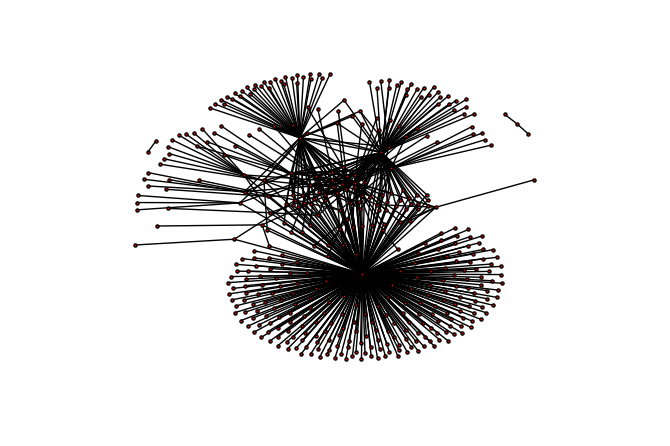

In [70]:
# draw graph, we can make it nicer later
nx.draw(G, node_size= 5)

### Find communities

In [71]:
import community

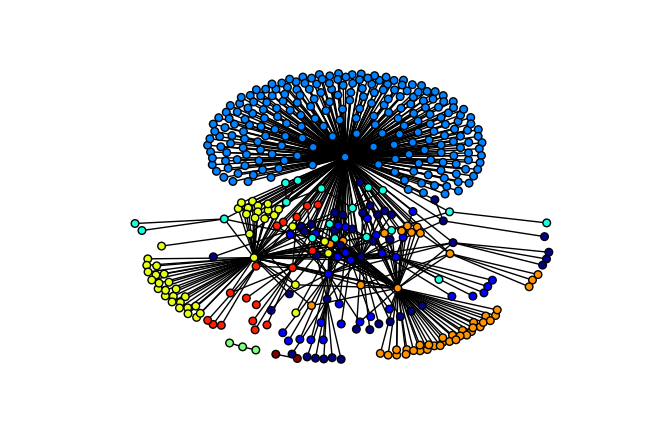

In [72]:
# Find modularity
part = community.best_partition(G)
mod = community.modularity(part,G)

# Plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

In [73]:
print('Number of communities are ', np.max(values))

Number of communities are  8


In [74]:
all_sender_email = all_sender_receiver.loc[:, ['SenderPersonId','ExtractedBodyText']]

In [75]:
all_sender_email.head()

,SenderPersonId,ExtractedBodyText
Id,,
3,32.0,Thx
5,80.0,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
6,80.0,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
8,80.0,"H <hrod17@clintonemail.corn>\nFriday, March 11..."
9,87.0,FYI


In [76]:
community_list = []
for i in all_sender_email.index:
    community_list.append(part[all_sender_email.loc[i,'SenderPersonId']])
# add one column for community
all_sender_email['community'] = community_list

In [77]:
all_sender_email.head()

,SenderPersonId,ExtractedBodyText,community
Id,,,
3,32.0,Thx,6
5,80.0,"H <hrod17@clintonemail.com>\nFriday, March 11,...",2
6,80.0,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,2
8,80.0,"H <hrod17@clintonemail.corn>\nFriday, March 11...",2
9,87.0,FYI,0


In [78]:
# groupby community and obtain the summed bodytext
summed_text = all_sender_email.groupby('community')['ExtractedBodyText'].sum()
summed_text

community
0    FYIFyi\nB6\n— —FyiI asked to attend your svtc ...
1    Anne-Marie Slaughter\nSunday, March 13, 2011 9...
2    H <hrod17@clintonemail.com>\nFriday, March 11,...
3    8.25 am DEPART Private Residence En route Stat...
4    Cc: Cheryl, Doug, Justin\nThere is a context s...
5    http://religion.b1ogs.cnn.com/20 1 2/09/13/my-...
6    Thx_ .....\nFrom Randolph, Lawrence M\nSent: W...
7    - Benghazi\nSounds good.MS, please find below ...
8    Gentlemen, for your information below.\nWerner...
Name: ExtractedBodyText, dtype: object

In [79]:
# define a function to extract top 20 words for a given text
def extract_top_20_words(txt):
    txt = remove_punctuation(txt)
    tokens = nltk.word_tokenize(txt)
    tokens = [i.lower() for i in tokens if i.lower() not in stopwords]
    tokens_origin = split_digi_letter(tokens)
    # stemming the tokens word by LancasterStemmer
    token_stemmed = [wnl.lemmatize(i) for i in tokens_origin]
    # Since we cannot get any information from digit strings,
    # we will simply drop those strings and perform analysis to the rest.
    token_stemmed_reduced = [i for i in token_stemmed if not i.isdigit()]
    # drop single letter tokens
    token_stemmed_reduced = [i for i in token_stemmed_reduced if len(i)>1]
    tokens_freq_postprocess = itemfreq(token_stemmed_reduced)
    tokens1, tokens_freq1 = tokens_freq_postprocess[:, 0], tokens_freq_postprocess[:, 1].astype(int)
    tokens_x_freq = [(tokens1[i], tokens_freq1[i]) for i in range(len(tokens1))]
    return tokens1[np.array(tokens_freq1).argsort()[::-1][:20]]

In [80]:
# define a diction to store top 20 words for each community for sender
community_word = {}
for i in summed_text.index:    
    txt = summed_text[i]
    community_word[i] = extract_top_20_words(txt)

In [81]:
community_word

{0: array(['state', 'said', 'agreement', 'government', 'united', 'department',
        'benghazi', 'people', 'president', 'house', 'work', 'information',
        'one', 'security', 'date', 'country', 'sensitive', 'secretary',
        'doc', 'today'], 
       dtype='<U53'),
 1: array(['state', 'clinton', 'said', 'new', 'one', 'policy', 'time', 'think',
        'president', 'secretary', 'now', 'foreign', 'work', 'government',
        'issue', 'people', 'department', 'obama', 'american', 'year'], 
       dtype='<U69'),
 2: array(['hrod', 'clintonemailcom', 'see', 'state', 'know', 'time', 'want',
        'need', 'im', 'let', 'work', 'pls', 'talk', 'go', 'now', 'think',
        'one', 'back', 'clinton', 'tomorrow'], 
       dtype='<U72'),
 3: array(['woman', 'state', 'said', 'year', 'new', 'department', 'one',
        'right', 'secretary', 'afghan', 'afghanistan', 'house', 'issue',
        'meeting', 'many', 'time', 'know', 'information', 'bill', 'country'], 
       dtype='<U32'),
 4: array

From the high frequency words, we can try to analyse the topic about these emails.
- The 1st community shows emails are about Benghazi attack and security lapses. 
- The 2nd community shows the emails is about American issues and policy.
- The 3th community just shows personal work and schedule.
- The 4th community is about Afghan women，which implied clinton’s vow about defending rights of Afghan women.
- The 5th community is about Haitian government and from ‘latrine’， 'settlement'，we guess it’s about the supply to Haiti.
- The 6th implies the information about personal schedule and the plan of meeting.
- The 7th  community is about Hillary Clinton try to strike a balance on the subject of Israel. At the same time, it’s also talk about Obama's policy about Israel.
- The 8th  community is about some conference and staff. 
- The 9th community is about work time and sleep deprivation, Which estimates maybe Hillary worried about the sleeping.

Compare the result you obtained from question 3: words show the similar topic, but not totally same. In question 3, we use each email text with LDA model and get the corresponding number of topics. But here, we find communities first then find the high frequency words in these communities. This is may cause the differences between them. Besides, the parametrs in the question 3 also cause the difference. However, some topics are same, like Benghazi attack, Haitian support and  Israel issue, which shows that are important part in the emails.